In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from joblib import dump, load
import os

In [3]:
SEED = 42

# Data analysis

In [22]:
input_file = 'house_v4'

In [23]:
df = pd.read_csv(f'data/{input_file}.csv')
df

,class,BJ_5G,Santi-2G,BJ_2G,ARI_2G,VIVOFIBRA-1EB0,Santi-5G,Unnamed: 6,Lais,#NET-CLARO-WIFI,...,CLARO_2G988AD9,Unnamed: 54,NET_2G5E3A5E,Cozinha da In@ 2G,PATRICIA 2G,VIVOFIBRA-1EB0-5G,Willian,LIGUE-IRAN,Unnamed: 61,Unnamed: 62
0,q1,-35.0,-67.0,-22.0,-90.0,-89.0,-78.0,-22.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,q1,-39.0,-67.0,-20.0,-100.0,-85.0,-81.0,-72.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,q1,-36.0,-63.0,-22.0,-100.0,-85.0,-75.0,-66.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,q1,-43.0,-73.0,-37.0,-89.0,-85.0,-76.0,-69.0,-95.0,-90.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,q1,-47.0,-76.0,-43.0,-93.0,-89.0,-74.0,-64.0,-90.0,-94.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,s1,-64.0,-49.0,-49.0,-88.0,-84.0,-65.0,-100.0,-89.0,-90.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-66.0
1206,s1,-64.0,-49.0,-49.0,-89.0,-84.0,-65.0,-100.0,-93.0,-90.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-66.0
1207,s1,-64.0,-49.0,-49.0,-89.0,-84.0,-65.0,-100.0,-93.0,-90.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-66.0
1208,s1,-64.0,-49.0,-49.0,-89.0,-84.0,-65.0,-100.0,-93.0,-90.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-66.0


# Data prepraration

In [24]:
def remove_columns():
    for column in df.columns:
        if 'Unnamed:' in column or'#NET-CLARO-WIFI' in column:
            df.drop(columns=[column], inplace=True)
    return df

In [25]:
df = remove_columns()
df.columns, len(df.columns)

(Index(['class', 'BJ_5G', 'Santi-2G', 'BJ_2G', 'ARI_2G', 'VIVOFIBRA-1EB0',
        'Santi-5G', 'Lais', 'CLARO_2G46D856', 'ANA 2.4G', 'Rubens_2.4', 'INA ',
        'plenna_inteligenti', 'Familia', 'VIVOFIBRA-FF20', 'InÃ¡ Corp',
        'Cozinha da InÃ¡', '((TURIS))', 'Maria_2G', 'BUCKER', 'AMNET85_8295',
        'CLARO_2G92213C', 'VIVOFIBRA-F7E8', '((Internacional))', '2G Lucineia',
        'ALEXANDRE1', 'andre', 'CLARO_2G743AC1', 'INA _EXT', 'CasadoTapeceiro',
        'Living Room TV.v,', 'Gourmet TV.b,', 'Sabadotto', 'Apt_304_2.0_EXT',
        'APT1104', 'ROMEU_2g', 'Ari', 'DIRECT-99-HP DeskJet 2700 series',
        'VIVOFIBRA-4CD1', 'VIVO 1401', 'CLARO_2G69D958', 'CAMARGO 08',
        'Apt_304_2.0', 'VIVOFIBRA-1404', 'NET_2G294992', 'CLARO_2G988AD9',
        'NET_2G5E3A5E', 'Cozinha da In@ 2G', 'PATRICIA 2G', 'VIVOFIBRA-1EB0-5G',
        'Willian', 'LIGUE-IRAN'],
       dtype='object'),
 52)

In [26]:
df['class'].value_counts()

s1    415
p     245
g     240
q1    166
c     144
Name: class, dtype: int64

In [27]:
X = df.drop(columns=['class'])
y = df['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=SEED)

In [29]:
y_train.value_counts()

s1    332
p     196
g     192
q1    133
c     115
Name: class, dtype: int64

In [30]:
y_test.value_counts()

s1    83
p     49
g     48
q1    33
c     29
Name: class, dtype: int64

# Model fit

In [48]:
model = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000),
                      alpha=0.0001,
                      solver='adam',
                      random_state=SEED,
                      verbose=True,
                      n_iter_no_change=25,
                      max_iter=1000,)

In [49]:
model.fit(X_train, y_train)

Iteration 1, loss = 20.23674421
Iteration 2, loss = 11.50119022
Iteration 3, loss = 5.58938183
Iteration 4, loss = 1.91615143
Iteration 5, loss = 1.50462147
Iteration 6, loss = 1.38799485
Iteration 7, loss = 1.26156776
Iteration 8, loss = 1.09370719
Iteration 9, loss = 0.97085367
Iteration 10, loss = 0.78295573
Iteration 11, loss = 0.77833472
Iteration 12, loss = 0.58315602
Iteration 13, loss = 1.15888876
Iteration 14, loss = 0.88079480
Iteration 15, loss = 0.74606742
Iteration 16, loss = 0.64484570
Iteration 17, loss = 0.58061039
Iteration 18, loss = 0.54480308
Iteration 19, loss = 0.53783463
Iteration 20, loss = 0.44462266
Iteration 21, loss = 0.41539204
Iteration 22, loss = 0.41200324
Iteration 23, loss = 0.70080757
Iteration 24, loss = 0.49914819
Iteration 25, loss = 0.39161072
Iteration 26, loss = 0.45355382
Iteration 27, loss = 0.49775148
Iteration 28, loss = 0.31870232
Iteration 29, loss = 0.27638840
Iteration 30, loss = 0.24381994
Iteration 31, loss = 0.65495228
Iteration 32, l

MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000), max_iter=1000,
              n_iter_no_change=25, random_state=42, verbose=True)

# Test

In [50]:
y_pred = model.predict(X_test)

In [51]:
report = classification_report(y_true=y_test, y_pred=y_pred)

In [52]:
print(report)

              precision    recall  f1-score   support

           c       0.80      0.97      0.88        29
           g       0.83      1.00      0.91        48
           p       1.00      0.82      0.90        49
          q1       1.00      1.00      1.00        33
          s1       1.00      0.92      0.96        83

    accuracy                           0.93       242
   macro avg       0.93      0.94      0.93       242
weighted avg       0.94      0.93      0.93       242



<AxesSubplot:>

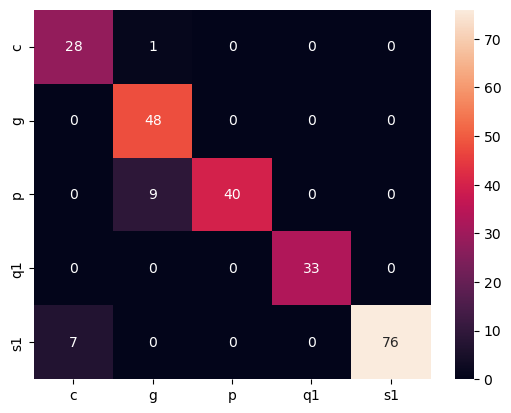

In [53]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=model.classes_,
            yticklabels=model.classes_)

In [54]:
model_name = 'model_' + input_file.split('_')[-1]
model_name

'model_v4'

In [55]:
dump(model, f'models/{model_name}.joblib')

['models/model_v4.joblib']

In [56]:
model = load(f'models/{model_name}.joblib')

In [57]:
model.feature_names_in_

array(['BJ_5G', 'Santi-2G', 'BJ_2G', 'ARI_2G', 'VIVOFIBRA-1EB0',
       'Santi-5G', 'Lais', 'CLARO_2G46D856', 'ANA 2.4G', 'Rubens_2.4',
       'INA ', 'plenna_inteligenti', 'Familia', 'VIVOFIBRA-FF20',
       'InÃ¡ Corp', 'Cozinha da InÃ¡', '((TURIS))', 'Maria_2G', 'BUCKER',
       'AMNET85_8295', 'CLARO_2G92213C', 'VIVOFIBRA-F7E8',
       '((Internacional))', '2G Lucineia', 'ALEXANDRE1', 'andre',
       'CLARO_2G743AC1', 'INA _EXT', 'CasadoTapeceiro',
       'Living Room TV.v,', 'Gourmet TV.b,', 'Sabadotto',
       'Apt_304_2.0_EXT', 'APT1104', 'ROMEU_2g', 'Ari',
       'DIRECT-99-HP DeskJet 2700 series', 'VIVOFIBRA-4CD1', 'VIVO 1401',
       'CLARO_2G69D958', 'CAMARGO 08', 'Apt_304_2.0', 'VIVOFIBRA-1404',
       'NET_2G294992', 'CLARO_2G988AD9', 'NET_2G5E3A5E',
       'Cozinha da In@ 2G', 'PATRICIA 2G', 'VIVOFIBRA-1EB0-5G', 'Willian',
       'LIGUE-IRAN'], dtype=object)

In [58]:
model.classes_

array(['c', 'g', 'p', 'q1', 's1'], dtype='<U2')